In [46]:
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [49]:

csv = Path("kmeans").with_name('Markers.CSV')
x = pd.read_csv(csv)

# Read the source CSV file
df_source = pd.read_csv('CMA.csv')

# Read the target CSV file
df_target = pd.read_csv('Markers.csv')

# Specify the common key column
common_key = 'PublicID'  # Replace 'ID' with the actual column name

# Specify the columns to copy from the source CSV file
columns_to_copy = ['CMAE04a3a', 'CMAE04a3b', 'CMAE04a3c']  # Replace with the actual column names

# Merge the data based on the common key column
df_merged = df_target.merge(df_source[[common_key] + columns_to_copy], on=common_key, how='left')

# Save the updated data to a new CSV file
df_merged.to_csv('Markers_new.csv', index=False)

data = pd.read_csv('Markers_new.csv')

data = data.rename(columns={'CMAE04a1a': 'Depression_pre', 'CMAE04a1b': 'Depression_during', 'CMAE04a1c': 'Depression_post', 'CMAE04a2a': 'Anxiety_pre', 'CMAE04a2b': 'Anxiety_during', 'CMAE04a2c': 'Anxiety_post', 'CMAE04a3a': 'Bipolar_pre', 'CMAE04a3b': 'Bipolar_during', 'CMAE04a3c': 'Bipolar_post'})

data.drop(columns=["PublicID"], inplace=True)  #dropping non int columns
data.drop(columns=["Unnamed: 0"], inplace=True)
data = data.fillna(0) # Have to double check this
# data.drop(columns=["clusters"], inplace=True)

In [50]:

from kmodes.kmodes import KModes
from scipy.cluster.hierarchy import linkage, dendrogram

# K-Modes Clustering
k = 5  # Number of clusters
kmodes = KModes(n_clusters=k, init="Huang", n_init=20, verbose=1)
kmodes.fit(data)

# Print cluster labels for K-Modes clustering
print("K-Modes Clustering:")
cluster_labels = kmodes.labels_
cluster_labels_series = pd.Series(cluster_labels)
print(cluster_labels_series.value_counts())

data['Cluster'] = cluster_labels


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 282, cost: 3036.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 235, cost: 3538.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 123, cost: 3258.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1525, cost: 3907.0
Run 4, iteration: 2/100, moves: 340, cost: 3907.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 4245.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 216, cost: 3956.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 296, cost: 3955.0
Init: initializing centroids
Init: initia

In [51]:
data['cluster'] = cluster_labels

data[['Anxiety_pre', 'Anxiety_during', 'Anxiety_post', 'Depression_pre', 'Depression_during', 'Depression_post']] = data[['Anxiety_pre', 'Anxiety_during', 'Anxiety_post', 'Depression_pre', 'Depression_during', 'Depression_post']].astype('Int64').fillna(0)

# data['Anxiety_Depression'] = ((data['Anxiety_pre'] | data['Anxiety_during'] | data['Anxiety_post']) & (data['Depression_pre'] | data['Depression_during'] | data['Depression_post'])).astype(int)

data['Anxiety_Depression'] = ((np.bitwise_or.reduce([data['Anxiety_pre'], data['Anxiety_during'], data['Anxiety_post']])) &
                              (np.bitwise_or.reduce([data['Depression_pre'], data['Depression_during'], data['Depression_post']]))).astype(int)


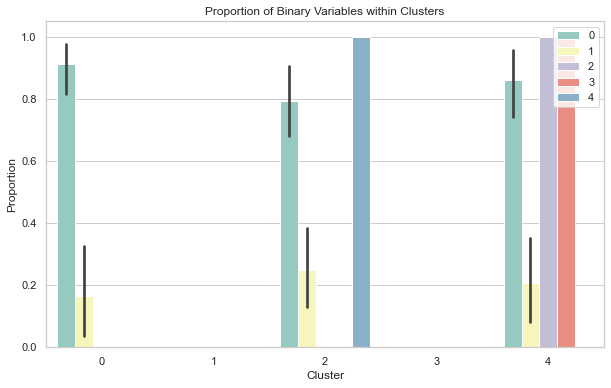

In [20]:
import seaborn as sns

sns.set(style="whitegrid")

# Create a new DataFrame with cluster information
cluster_data = pd.DataFrame({'Cluster': data['cluster']})

# Iterate over each binary variable and calculate its proportion within each cluster
for column in data.columns:
    if column != 'cluster':
        counts = data.groupby(['cluster', column]).size().unstack()
        proportions = counts.div(counts.sum(axis=1), axis=0)
        cluster_data = pd.concat([cluster_data, proportions], axis=1)

# Melt the DataFrame to convert it to long format for plotting
melted_data = pd.melt(cluster_data, id_vars='Cluster', var_name='Binary Variable', value_name='Proportion')

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Proportion', hue='Binary Variable', data=melted_data, palette='Set3')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('Proportion of Binary Variables within Clusters')
plt.legend(loc='upper right')
plt.show()


In [38]:
data = data.drop('Cluster', axis=1)

data.to_csv('Markers_new.csv', index=False)

In [67]:
data['Bipolar_pre'] = data['Bipolar_pre'].astype('Int64')
data['Bipolar_during'] = data['Bipolar_during'].astype('Int64')
data['Bipolar_post'] = data['Bipolar_post'].astype('Int64')
data = data.drop('Cluster', axis=1)

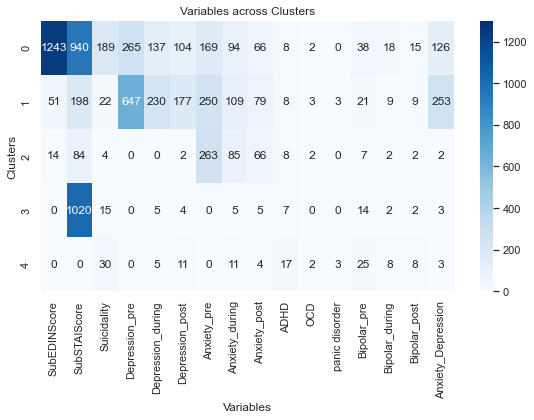

<Figure size 432x288 with 0 Axes>

In [72]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Convert the binary_occurrence DataFrame to a NumPy array with float data type
binary_array = binary_occurrence.astype(float)

# Replace non-numeric values with NaN
binary_array = binary_array.replace('N', np.nan)

plt.figure(figsize=(8, 6))
sns.heatmap(binary_array, cmap='Blues', annot=True, fmt='.0f', vmin=0, vmax=1300)
plt.title('Variables across Clusters')
plt.xlabel('Variables')
plt.ylabel('Clusters')

plt.tight_layout()
plt.show()
plt.savefig('heatmap.png')


In [73]:
data.to_csv('Markers_new.csv', index=False)